In [1]:
from sklearn import datasets
import numpy as np

In [2]:
iris=datasets.load_iris()

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

## 读取特征和标签

In [4]:
x=iris.data[:,[2,3]] #取后两个特征
y=iris.target

print('class labels:',np.unique(y))

class labels: [0 1 2]


## 数据切分

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [10]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, **options)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float, int or None, optional (default=None)
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        complement of the train size. If ``train_s

## 查看数据维度

In [7]:
x_train.shape

(105, 2)

In [8]:
x_test.shape

(45, 2)

In [9]:
y_train.shape

(105,)

In [11]:
y_test.shape

(45,)

## 数据标准化

In [12]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
sc.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:
sc.scale_

array([1.79595918, 0.77637684])

In [15]:
x_train_std=sc.transform(x_train)
x_test_std=sc.transform(x_test)

## 机器学习分类模型建模

### 1.感知器

In [17]:
from sklearn.linear_model import Perceptron

In [18]:
ppn=Perceptron(max_iter=5)

In [19]:
ppn.fit(x_train_std,y_train)

/Users/xiaonaozhong/anaconda3/envs/p3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=5, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [20]:
ppn.coef_

array([[-0.93066067, -0.7372463 ],
       [ 2.50562487, -3.22008575],
       [ 2.9272062 ,  3.29123431]])

In [22]:
ppn.intercept_

array([-1.,  0., -2.])

In [23]:
y_pred=ppn.predict(x_test_std)

In [24]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 2, 1, 1, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 2, 2,
       1, 0, 2, 0, 0, 1, 1, 0, 2, 2, 0, 2, 2, 1, 0, 2, 2, 1, 2, 0, 2, 0,
       0])

In [25]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0])

In [26]:
y_pred==y_test

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False, False,  True, False,  True,  True, False,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True])

In [27]:
print((y_test!=y_pred).sum())

10


In [28]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(y_test,y_pred)

0.7777777777777778

### 2.逻辑回归

In [31]:
from sklearn.linear_model import LogisticRegression

In [33]:
lr=LogisticRegression(C=1000.0,random_state=0)
lr.fit(x_train_std,y_train)

/Users/xiaonaozhong/anaconda3/envs/p3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/xiaonaozhong/anaconda3/envs/p3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
lr.coef_

array([[-7.17909286, -6.81412164],
       [ 2.57725913, -2.37822768],
       [ 9.46639729,  6.43327101]])

In [35]:
lr.intercept_

array([-9.31600807, -0.89601154, -8.85011109])

In [36]:
y_pred=lr.predict(x_test_std)

In [37]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [38]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0])

In [39]:
(y_test!=y_pred).sum()

1

## 过拟合和正则化

underfitting: 模型没有很好的拟合当前场景。
overfitting：模型过度拟合训练数据。

### 最大间隔分类和支持向量机

In [40]:
from sklearn.svm import SVC

In [43]:
svm=SVC(kernel='linear',C=1.0,random_state=0)
svm.fit(x_train_std,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [44]:
svm.coef_

array([[-1.20926741, -1.19390874],
       [-0.64695654, -0.64139004],
       [-1.6201406 , -2.12498646]])

In [46]:
svm.intercept_

array([-1.70593281, -0.36788278,  1.98730378])

In [47]:
y_pred=svm.predict(x_test_std)

In [48]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [49]:
(y_pred!=y_test).sum()

1

## 决策树模型

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
tree=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)

In [52]:
tree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [54]:
y_pred=tree.predict(x_test)

In [55]:
(y_pred!=y_test).sum()

1

In [57]:
from sklearn.tree import export_graphviz

export_graphviz(tree,out_file='tree.dot',feature_names=['petal length','petal width'])

In [60]:
import pydotplus

In [59]:
 dot_data=export_graphviz(tree,out_file=None,feature_names=['petal length','petal width'],class_names=['s','ver','vir'],filled=True,rounded=True)

In [61]:
graph=pydotplus.graph_from_dot_data(dot_data)

In [63]:
from IPython.display import Image,display

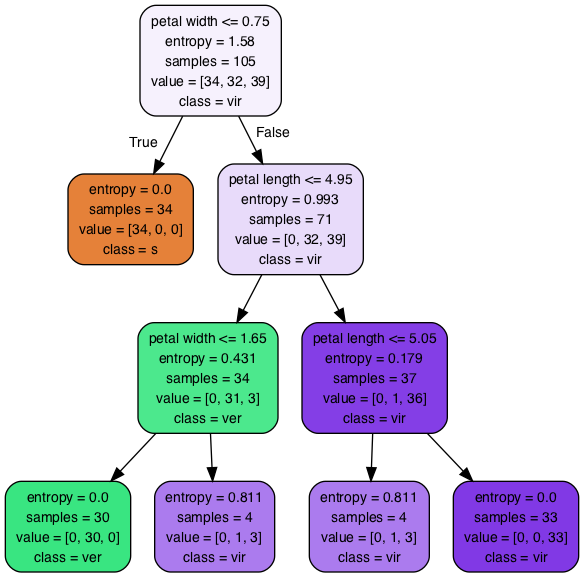

In [64]:
display(Image(graph.create_png()))

## 集成与随机森林

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
forest=RandomForestClassifier(criterion='entropy',n_estimators=10,random_state=1,n_jobs=2)
forest.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
                       oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

## K近邻

In [67]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')
knn.fit(x_train_std,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [68]:
y_pred=knn.predict(x_test)

In [71]:
(y_pred!=y_test).sum()

34